In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [61]:
# Create the dataset
data = {
    'CustomerID': list(range(1, n_customers + 1)),
    'Gender': np.random.choice(['Male', 'Female'], n_customers),
    'Age': np.random.randint(18, 70, n_customers),
    'AnnualIncome_k': np.random.randint(15, 80, n_customers),
    'SpendingScore': np.random.randint(1, 100, n_customers)
}

In [63]:
# Create natural clusters
df = pd.DataFrame(data)

In [65]:
mask1 = (df['Age'] < 30) & (df['SpendingScore'] > 70)
df.loc[mask1, 'AnnualIncome_k'] = np.random.randint(40, 80, mask1.sum())

In [67]:
mask2 = (df['Age'] >= 30) & (df['Age'] < 50) & (df['AnnualIncome_k'] > 50)
df.loc[mask2, 'SpendingScore'] = np.random.randint(40, 60, mask2.sum())

In [69]:
mask3 = (df['Age'] >= 50)
df.loc[mask3, 'SpendingScore'] = np.random.randint(10, 40, mask3.sum())

In [71]:
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)

DATASET INFORMATION


In [73]:
print(f"Shape of dataset: {df.shape}")
print(f"Number of customers: {len(df)}")

Shape of dataset: (200, 5)
Number of customers: 200


In [75]:
print(f"\nColumn names: {df.columns.tolist()}")


Column names: ['CustomerID', 'Gender', 'Age', 'AnnualIncome_k', 'SpendingScore']


In [77]:
print(f"\nData types:\n{df.dtypes}")


Data types:
CustomerID         int64
Gender            object
Age                int32
AnnualIncome_k     int32
SpendingScore      int32
dtype: object


In [79]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,CustomerID,Gender,Age,AnnualIncome_k,SpendingScore
0,1,Male,49,68,44
1,2,Female,56,22,33
2,3,Male,66,41,14
3,4,Male,69,41,11
4,5,Male,49,35,14


In [83]:
# Create a copy for preprocessing
df_processed = df.copy()

In [85]:
# Convert Gender to numerical (0 for Female, 1 for Male)
df_processed['Gender_Encoded'] = df_processed['Gender'].map({'Female': 0, 'Male': 1})

In [87]:
# Select features for clustering (excluding CustomerID)
features = ['Age', 'AnnualIncome_k', 'SpendingScore']
X = df_processed[features]

In [89]:
print("\nSelected features for clustering:")
print(features)
print(f"\nFeature matrix shape: {X.shape}")


Selected features for clustering:
['Age', 'AnnualIncome_k', 'SpendingScore']

Feature matrix shape: (200, 3)


In [91]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
print("Features scaled successfully!")
print(f"Scaled data shape: {X_scaled.shape}")

Features scaled successfully!
Scaled data shape: (200, 3)


In [95]:
# Calculate WCSS for different k values
wcss = []
silhouette_scores = []
k_range = range(2, 11)

In [97]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

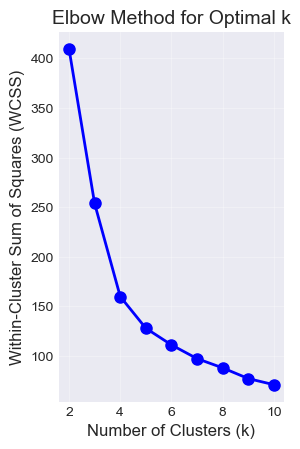

In [45]:
# Subplot 1: Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)

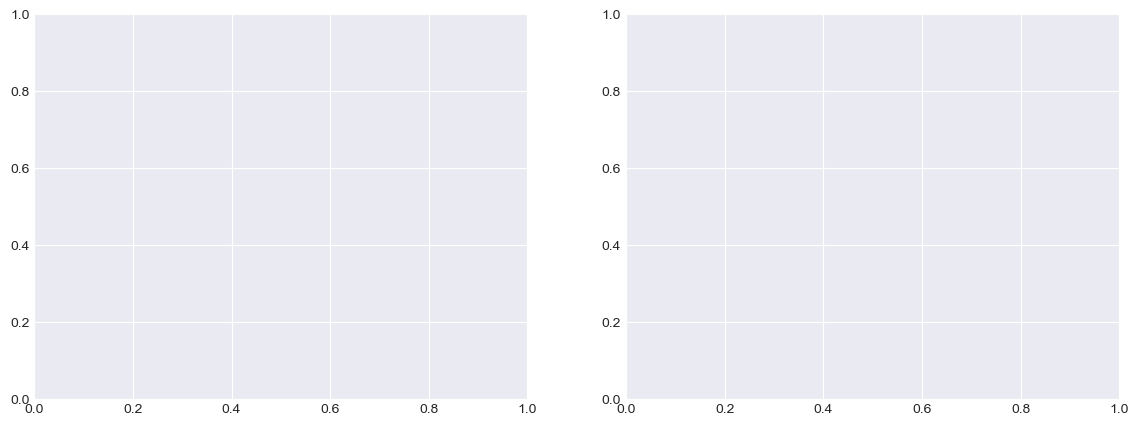

In [99]:
# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

In [101]:
# Subplot 1: Elbow Method
ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14)
ax1.grid(True, alpha=0.3)

In [51]:
plt.savefig("plot.png", dpi=100) 

<Figure size 640x480 with 0 Axes>

In [103]:
# Add markers for each point
for i, (k, w) in enumerate(zip(k_range, wcss)):
    ax1.text(k, w, f'k={k}', fontsize=10, ha='center', va='bottom')

In [107]:
# Subplot 2: Silhouette Score
ax2.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score Analysis', fontsize=14)
ax2.grid(True, alpha=0.3)

In [109]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [111]:
# Find optimal k (using elbow point and silhouette score)
optimal_k = 5  # Based on visual inspection of elbow plot
print(f"Based on elbow method, optimal number of clusters (k) is: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

Based on elbow method, optimal number of clusters (k) is: 5
Best silhouette score: 0.374


In [113]:
# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [115]:
# Add cluster labels to the dataframe
df_processed['Cluster'] = cluster_labels

In [119]:
print("K-Means clustering completed successfully!")
print(f"Cluster distribution:")
cluster_counts = df_processed['Cluster'].value_counts().sort_index()
for cluster_num, count in cluster_counts.items():
    percentage = (count / len(df_processed)) * 100
    print(f"  Cluster {cluster_num}: {count} customers ({percentage:.1f}%)")

K-Means clustering completed successfully!
Cluster distribution:
  Cluster 0: 36 customers (18.0%)
  Cluster 1: 48 customers (24.0%)
  Cluster 2: 36 customers (18.0%)
  Cluster 3: 56 customers (28.0%)
  Cluster 4: 24 customers (12.0%)


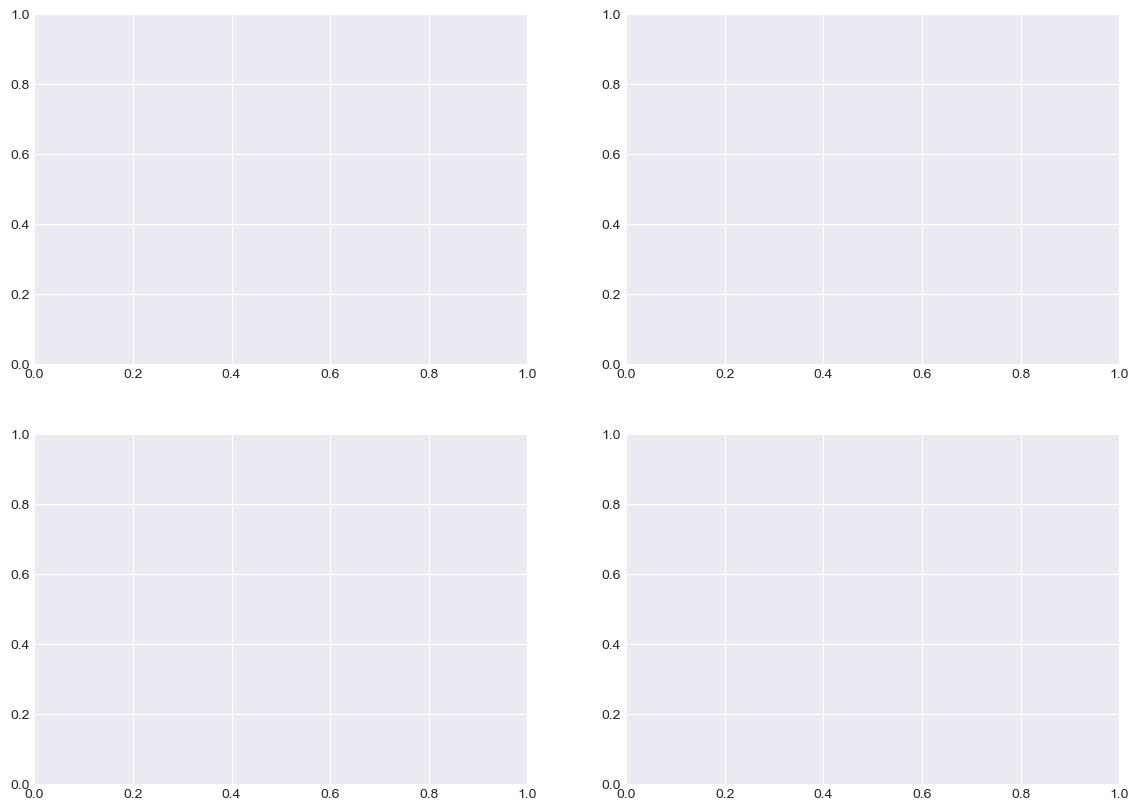

In [121]:
# Create 2D visualizations instead of 3D to avoid issues
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [123]:
# Plot 1: Age vs Spending Score
scatter1 = axes[0, 0].scatter(df_processed['Age'], 
                             df_processed['SpendingScore'],
                             c=df_processed['Cluster'], 
                             cmap='viridis',
                             s=60, alpha=0.7)
axes[0, 0].set_xlabel('Age', fontsize=11)
axes[0, 0].set_ylabel('Spending Score', fontsize=11)
axes[0, 0].set_title('Age vs Spending Score', fontsize=14)
plt.colorbar(scatter1, ax=axes[0, 0], label='Cluster')

<Figure size 640x480 with 0 Axes>

In [125]:
# Plot 2: Annual Income vs Spending Score
scatter2 = axes[0, 1].scatter(df_processed['AnnualIncome_k'], 
                             df_processed['SpendingScore'],
                             c=df_processed['Cluster'], 
                             cmap='plasma',
                             s=60, alpha=0.7)
axes[0, 1].set_xlabel('Annual Income (k$)', fontsize=11)
axes[0, 1].set_ylabel('Spending Score', fontsize=11)
axes[0, 1].set_title('Income vs Spending Score', fontsize=14)
plt.colorbar(scatter2, ax=axes[0, 1], label='Cluster')

<Figure size 640x480 with 0 Axes>

In [127]:
# Plot 3: Age vs Annual Income
scatter3 = axes[1, 0].scatter(df_processed['Age'], 
                             df_processed['AnnualIncome_k'],
                             c=df_processed['Cluster'], 
                             cmap='coolwarm',
                             s=60, alpha=0.7)
axes[1, 0].set_xlabel('Age', fontsize=11)
axes[1, 0].set_ylabel('Annual Income (k$)', fontsize=11)
axes[1, 0].set_title('Age vs Annual Income', fontsize=14)
plt.colorbar(scatter3, ax=axes[1, 0], label='Cluster')

<Figure size 640x480 with 0 Axes>

In [129]:
# Plot 4: Gender Distribution per Cluster
cluster_groups = df_processed.groupby('Cluster')['Gender'].value_counts().unstack().fillna(0)
cluster_groups.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['pink', 'lightblue'])
axes[1, 1].set_xlabel('Cluster', fontsize=11)
axes[1, 1].set_ylabel('Number of Customers', fontsize=11)
axes[1, 1].set_title('Gender Distribution per Cluster', fontsize=14)
axes[1, 1].legend(['Female', 'Male'], title='Gender')
axes[1, 1].tick_params(axis='x', rotation=0)

In [131]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [133]:
# Analyze each cluster
cluster_profiles = []

In [135]:
for cluster_num in range(optimal_k):
    cluster_data = df_processed[df_processed['Cluster'] == cluster_num]
    
    # Calculate gender percentages
    gender_counts = cluster_data['Gender'].value_counts()
    male_pct = (gender_counts.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_counts.get('Female', 0) / len(cluster_data)) * 100
    
    profile = {
        'Cluster': cluster_num,
        'Size': len(cluster_data),
        'Percentage': (len(cluster_data) / len(df_processed)) * 100,
        'Avg_Age': cluster_data['Age'].mean(),
        'Std_Age': cluster_data['Age'].std(),
        'Avg_Income': cluster_data['AnnualIncome_k'].mean(),
        'Std_Income': cluster_data['AnnualIncome_k'].std(),
        'Avg_Spending': cluster_data['SpendingScore'].mean(),
        'Std_Spending': cluster_data['SpendingScore'].std(),
        'Male_%': male_pct,
        'Female_%': female_pct
    }
    cluster_profiles.append(profile)

In [137]:
# Create profile dataframe
profile_df = pd.DataFrame(cluster_profiles)
print("=" * 60)
print("CLUSTER PROFILES")
print("=" * 60)
display(profile_df.round(2))

CLUSTER PROFILES


,Cluster,Size,Percentage,Avg_Age,Std_Age,Avg_Income,Std_Income,Avg_Spending,Std_Spending,Male_%,Female_%
0,0,36,18.0,38.86,9.85,65.08,7.86,53.14,11.21,44.44,55.56
1,1,48,24.0,33.56,8.84,33.58,10.46,65.71,20.58,60.42,39.58
2,2,36,18.0,59.50,6.26,66.44,9.01,25.17,8.20,41.67,58.33
3,3,56,28.0,56.43,9.11,33.02,9.53,23.45,9.76,51.79,48.21
4,4,24,12.0,23.71,5.00,61.12,13.93,15.75,10.51,45.83,54.17


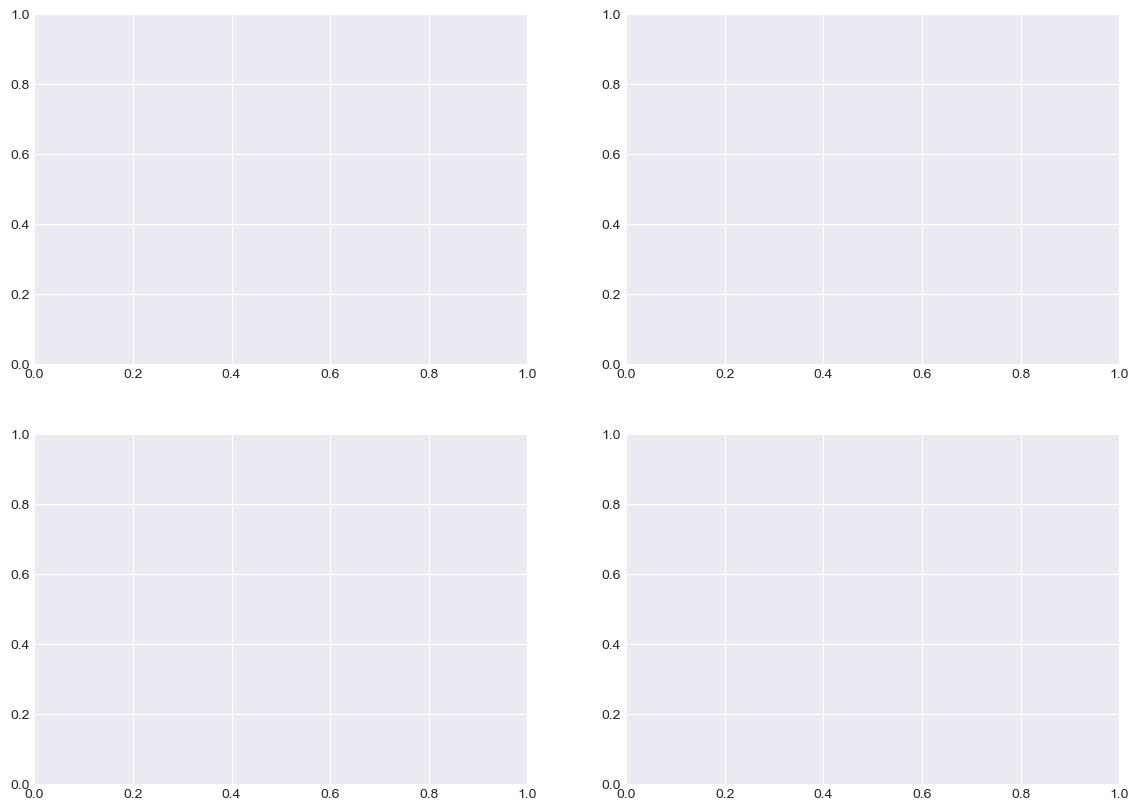

In [139]:
# Visualize cluster profiles
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

In [141]:
# Plot 1: Cluster sizes
bars1 = axes[0, 0].bar(profile_df['Cluster'].astype(str), profile_df['Size'], 
                      color=plt.cm.viridis(np.linspace(0, 1, optimal_k)))
axes[0, 0].set_xlabel('Cluster', fontsize=12)
axes[0, 0].set_ylabel('Number of Customers', fontsize=12)
axes[0, 0].set_title('Cluster Sizes', fontsize=14)
for i, v in enumerate(profile_df['Size']):
    axes[0, 0].text(i, v + 1, str(v), ha='center', fontsize=10)

In [143]:
# Plot 2: Average metrics
x = np.arange(len(profile_df))
width = 0.25
bars2a = axes[0, 1].bar(x - width, profile_df['Avg_Age'], width, 
                        label='Avg Age', color='lightcoral')
bars2b = axes[0, 1].bar(x, profile_df['Avg_Income'], width, 
                        label='Avg Income (k$)', color='lightgreen')
bars2c = axes[0, 1].bar(x + width, profile_df['Avg_Spending'], width, 
                        label='Avg Spending', color='lightblue')
axes[0, 1].set_xlabel('Cluster', fontsize=12)
axes[0, 1].set_ylabel('Values', fontsize=12)
axes[0, 1].set_title('Average Metrics per Cluster', fontsize=14)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(profile_df['Cluster'].astype(str))
axes[0, 1].legend()

In [146]:
# Plot 3: Gender distribution
bottom = np.zeros(len(profile_df))
bars3a = axes[1, 0].bar(profile_df['Cluster'].astype(str), profile_df['Male_%'], 
                        label='Male', color='lightblue', edgecolor='black')
bars3b = axes[1, 0].bar(profile_df['Cluster'].astype(str), profile_df['Female_%'], 
                        bottom=profile_df['Male_%'], label='Female', 
                        color='pink', edgecolor='black')
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Percentage (%)', fontsize=12)
axes[1, 0].set_title('Gender Distribution per Cluster', fontsize=14)
axes[1, 0].legend()

In [148]:
# Plot 4: Scatter of cluster centroids
scatter = axes[1, 1].scatter(profile_df['Avg_Income'], 
                            profile_df['Avg_Spending'], 
                            s=profile_df['Size']*5, 
                            c=profile_df['Cluster'], 
                            cmap='viridis', 
                            alpha=0.8, 
                            edgecolors='black')
axes[1, 1].set_xlabel('Average Income (k$)', fontsize=12)
axes[1, 1].set_ylabel('Average Spending Score', fontsize=12)
axes[1, 1].set_title('Cluster Centroids (Income vs Spending)', fontsize=14)

Text(0.5, 1.0, 'Cluster Centroids (Income vs Spending)')

In [150]:
# Add cluster labels and size to points
for i, row in profile_df.iterrows():
    axes[1, 1].annotate(f'C{int(row["Cluster"])}\n({int(row["Size"])})', 
                       xy=(row['Avg_Income'], row['Avg_Spending']),
                       xytext=(5, 5),
                       textcoords='offset points',
                       fontsize=9,
                       fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [152]:
print("=" * 70)
print("MARKETING RECOMMENDATIONS PER CLUSTER")
print("=" * 70)

MARKETING RECOMMENDATIONS PER CLUSTER


In [154]:
marketing_recommendations = []

In [170]:
for _, profile in profile_df.iterrows():
    cluster_num = int(profile['Cluster'])
    
    # Determine segment type based on characteristics
    if profile['Avg_Income'] > 60 and profile['Avg_Spending'] > 60:
        segment_type = "Premium Segment"
        recommendation = "Target with luxury products, exclusive offers, VIP services, and premium experiences"
    elif profile['Avg_Income'] > 50 and profile['Avg_Spending'] > 50:
        segment_type = "High-Value Segment"
        recommendation = "Offer loyalty programs, bundled products, quality assurance, and personalized service"
    elif profile['Avg_Income'] < 40 and profile['Avg_Spending'] > 60:
        segment_type = "Spendthrift Segment"
        recommendation = "Target with discounts on popular items, limited-time offers, and trendy products"
    elif profile['Avg_Income'] > 50 and profile['Avg_Spending'] < 40:
        segment_type = "Saver Segment"
        recommendation = "Focus on value-for-money products, bulk discounts, savings plans, and practical items"
    elif profile['Avg_Age'] < 30:
        segment_type = "Young Segment"
        recommendation = "Use social media marketing, trendy products, digital payments, and influencer collaborations"
    elif profile['Avg_Age'] > 50:
        segment_type = "Senior Segment"
        recommendation = "Focus on comfort, reliability, excellent customer service, and traditional values"
    else:
        segment_type = "Standard Segment"
        recommendation = "General marketing with balanced offers, wide product range, and good customer support"
        
    marketing_recommendations.append({
        'Cluster': cluster_num,
        'Segment Name': segment_type,
        'Customer Count': int(profile['Size']),
        'Avg Age': f"{profile['Avg_Age']:.1f}",
        'Avg Income': f"${profile['Avg_Income']:.1f}k",
        'Avg Spending': f"{profile['Avg_Spending']:.1f}",
        'Primary Gender': 'Male' if profile['Male_%'] > profile['Female_%'] else 'Female',
        'Marketing Recommendation': recommendation
    })

In [172]:
marketing_df = pd.DataFrame(marketing_recommendations)
display(marketing_df)

,Cluster,Segment Name,Customer Count,Avg Age,Avg Income,Avg Spending,Primary Gender,Marketing Recommendation
0,0,⭐ High-Value Segment,36,38.9,$65.1k,53.1,Female,"Offer loyalty programs, bundled products, qual..."
1,1,🛍️ Spendthrift Segment,48,33.6,$33.6k,65.7,Male,"Target with discounts on popular items, limite..."
2,2,💰 Saver Segment,36,59.5,$66.4k,25.2,Female,"Focus on value-for-money products, bulk discou..."
3,3,👵 Senior Segment,56,56.4,$33.0k,23.4,Male,"Focus on comfort, reliability, excellent custo..."
4,4,💰 Saver Segment,24,23.7,$61.1k,15.8,Female,"Focus on value-for-money products, bulk discou..."
5,0,High-Value Segment,36,38.9,$65.1k,53.1,Female,"Offer loyalty programs, bundled products, qual..."
6,1,Spendthrift Segment,48,33.6,$33.6k,65.7,Male,"Target with discounts on popular items, limite..."
7,2,Saver Segment,36,59.5,$66.4k,25.2,Female,"Focus on value-for-money products, bulk discou..."
8,3,Senior Segment,56,56.4,$33.0k,23.4,Male,"Focus on comfort, reliability, excellent custo..."
9,4,Saver Segment,24,23.7,$61.1k,15.8,Female,"Focus on value-for-money products, bulk discou..."


In [174]:
# Save the clustered data
df_processed.to_csv('customer_segmentation_results.csv', index=False)

In [176]:
# Save cluster profiles
profile_df.to_csv('cluster_profiles.csv', index=False)

In [178]:
# Save marketing recommendations
marketing_df.to_csv('marketing_recommendations.csv', index=False)

In [180]:
print("=" * 50)
print("RESULTS SAVED SUCCESSFULLY")
print("=" * 50)

RESULTS SAVED SUCCESSFULLY


In [184]:
print("1. customer_segmentation_results.csv - Full dataset with cluster labels")
print("2. cluster_profiles.csv - Detailed cluster statistics")
print("3. marketing_recommendations.csv - Marketing strategies per cluster")
print("\nFiles have been saved to your current working directory.")

1. customer_segmentation_results.csv - Full dataset with cluster labels
2. cluster_profiles.csv - Detailed cluster statistics
3. marketing_recommendations.csv - Marketing strategies per cluster

Files have been saved to your current working directory.


In [186]:
print("=" * 60)
print("PROJECT SUMMARY - CUSTOMER SEGMENTATION")
print("=" * 60)

PROJECT SUMMARY - CUSTOMER SEGMENTATION


In [188]:
print(f"Total customers analyzed: {len(df_processed)}")

Total customers analyzed: 200


In [190]:
print(f"Optimal number of clusters identified: {optimal_k}")

Optimal number of clusters identified: 5


In [192]:
print(f"Clustering algorithm used: K-Means with k-means++ initialization")

Clustering algorithm used: K-Means with k-means++ initialization


In [194]:
print(f"Features used for clustering: {features}")

Features used for clustering: ['Age', 'AnnualIncome_k', 'SpendingScore']


In [196]:
print(f"\nOverall silhouette score: {silhouette_score(X_scaled, cluster_labels):.3f}")


Overall silhouette score: 0.357


In [198]:
print(f"Total within-cluster sum of squares: {kmeans.inertia_:.2f}")

Total within-cluster sum of squares: 177.81


In [202]:
print("Cluster Distribution Summary:")

Cluster Distribution Summary:


In [204]:
for cluster_num in range(optimal_k):
    cluster_size = len(df_processed[df_processed['Cluster'] == cluster_num])
    percentage = (cluster_size / len(df_processed)) * 100
    cluster_data = df_processed[df_processed['Cluster'] == cluster_num]
    avg_age = cluster_data['Age'].mean()
    avg_income = cluster_data['AnnualIncome_k'].mean()
    avg_spending = cluster_data['SpendingScore'].mean()
    print(f"\n  Cluster {cluster_num}:")
    print(f"    • Size: {cluster_size} customers ({percentage:.1f}%)")
    print(f"    • Average Age: {avg_age:.1f} years")
    print(f"    • Average Income: ${avg_income:.1f}k")
    print(f"    • Average Spending Score: {avg_spending:.1f}")


  Cluster 0:
    • Size: 36 customers (18.0%)
    • Average Age: 38.9 years
    • Average Income: $65.1k
    • Average Spending Score: 53.1

  Cluster 1:
    • Size: 48 customers (24.0%)
    • Average Age: 33.6 years
    • Average Income: $33.6k
    • Average Spending Score: 65.7

  Cluster 2:
    • Size: 36 customers (18.0%)
    • Average Age: 59.5 years
    • Average Income: $66.4k
    • Average Spending Score: 25.2

  Cluster 3:
    • Size: 56 customers (28.0%)
    • Average Age: 56.4 years
    • Average Income: $33.0k
    • Average Spending Score: 23.4

  Cluster 4:
    • Size: 24 customers (12.0%)
    • Average Age: 23.7 years
    • Average Income: $61.1k
    • Average Spending Score: 15.8


In [207]:
print("The elbow method and silhouette analysis suggested 5 as the optimal number of clusters")

The elbow method and silhouette analysis suggested 5 as the optimal number of clusters


In [212]:
print("Each cluster shows distinct characteristics in terms of age, income, and spending behavior")

Each cluster shows distinct characteristics in terms of age, income, and spending behavior


In [215]:
print("Clear marketing personas have been identified for targeted marketing campaigns")

Clear marketing personas have been identified for targeted marketing campaigns


In [217]:
print("Results have been exported to CSV files for further business analysis")

Results have been exported to CSV files for further business analysis


In [219]:
print("The segmentation provides actionable insights for customer relationship management")

The segmentation provides actionable insights for customer relationship management


In [221]:
# Display sample of clustered data
print("\n" + "=" * 60)
print("SAMPLE OF CLUSTERED DATA")
print("=" * 60)


SAMPLE OF CLUSTERED DATA


In [223]:
sample_data = df_processed[['CustomerID', 'Gender', 'Age', 'AnnualIncome_k', 'SpendingScore', 'Cluster']].sample(10)
display(sample_data.sort_values('Cluster'))

,CustomerID,Gender,Age,AnnualIncome_k,SpendingScore,Cluster
168,169,Male,46,63,49,0
103,104,Female,46,48,96,1
84,85,Male,23,56,99,1
15,16,Male,30,31,58,1
57,58,Male,58,79,17,2
26,27,Female,45,46,5,3
60,61,Male,66,28,34,3
86,87,Female,21,66,20,4
109,110,Male,20,77,8,4
104,105,Female,20,62,16,4
